# Test transect code

### Import stuff

In [58]:

## Generic IMPORTS

# for paths appending used to import project modules
import sys 
import os # bones

## math and holding data
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime, timedelta
import importlib

# check how long stuff takes
import time
# ignore some warnings
import warnings

## plotting modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
# cartopy mapping
import cartopy.crs as ccrs
import cartopy.feature as cfeature


#magic function
%matplotlib inline

## Put us in the right repo for local relative pathing
__repo__="/g/data/en0/jwg574/repos/transect_testing/"
os.chdir(__repo__)
# make sure this repo is in syspath
if __repo__ not in sys.path:
    sys.path.extend([__repo__]) 

## LOCAL MODULES
import transect

# First we need a test 3d dataset with some topography

In [59]:
lats = np.arange(0,1,0.01)
lons = np.arange(0,1,0.01)
levs = np.arange(0,100,10)

nlevs = len(levs)
nlons,nlats = len(lons),len(lats)
print("%d levels by %d lats by %d lons"%(nlevs,nlats,nlons))

# start with constant wind
uwind5 = np.zeros([nlevs,nlats,nlons]) + 5
vwind5 = np.zeros([nlevs,nlats,nlons]) + 5
zwind1 = np.zeros([nlevs,nlats,nlons]) + 1

# set levels to be levs everywhere
z = np.zeros([nlevs,nlats,nlons]) + levs[:,np.newaxis,np.newaxis] # nlevs x 1 x 1 is broadcastable

# easy topography increasing with lons
topog_rise = np.zeros([nlats,nlons]) + np.linspace(0,max(levs)/5.0,nlons)[np.newaxis,:]


10 levels by 100 lats by 100 lons


## Try plotting simple transect

In [60]:
importlib.reload(transect)

<module 'transect' from '/g/data/en0/jwg574/repos/transect_testing/transect.py'>

DEBUG: yscale=393.13 (transect length/height)    mean horizontal wind speed= 7.0710678118654755


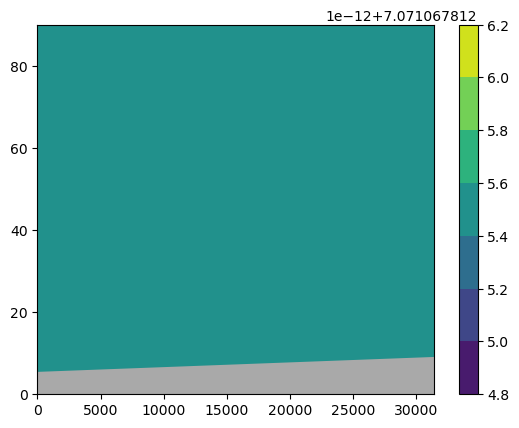

In [61]:

# transect
start = [.3,.3]
end = [.5,.5]

# default:
#transect.wind_cross_section(U, V, W, Z, lats, lons, start, end, topog=None, n_X=20, n_arrows=10, ztop=5000)
transect.wind_cross_section(U=uwind5, V=vwind5, W=zwind1, Z=z, 
                            lats=lats, lons=lons, 
                            start=start, end=end, 
                            topog=topog_rise, n_X=20, n_arrows=10, ztop=80,
                            add_quiver=False)


## Try some more to make sure it looks right

DEBUG: yscale=393.13 (transect length/height)    mean horizontal wind speed= 35.35533905932739


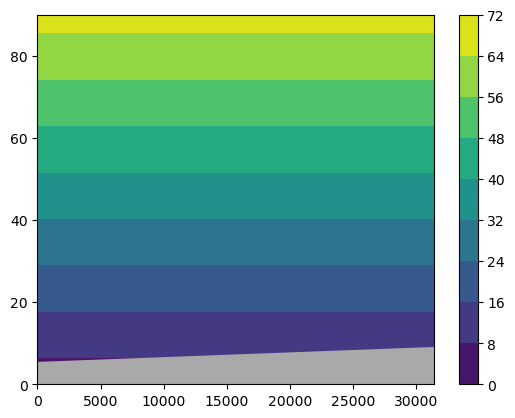

In [62]:
# start with constant wind
ushear = np.zeros([nlevs,nlats,nlons]) + levs[:,np.newaxis,np.newaxis]
#vwind5 = np.zeros([nlevs,nlats,nlons]) + 5
#zwind1 = np.zeros([nlevs,nlats,nlons]) + 1

transect.wind_cross_section(U=ushear, V=vwind5, W=zwind1, Z=z, 
                            lats=lats, lons=lons, 
                            start=start, end=end, 
                            topog=topog_rise, n_X=20, n_arrows=10, ztop=80,
                            add_quiver=False)

DEBUG: yscale=393.13 (transect length/height)    mean horizontal wind speed= 54.447222151364166


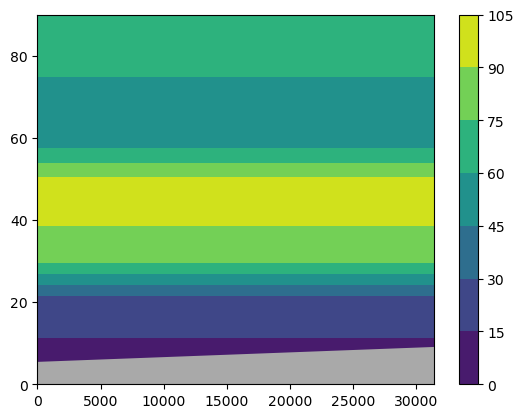

In [63]:
# wind jet ish
ujet = np.zeros([nlevs,nlats,nlons]) + np.array([10,10,10,80,90,80,10,10,10,10])[:,np.newaxis,np.newaxis]
vshear = np.zeros([nlevs,nlats,nlons]) + levs[:,np.newaxis,np.newaxis]
#zwind1 = np.zeros([nlevs,nlats,nlons]) + 1

transect.wind_cross_section(U=ujet, V=vshear, Z=z, 
                            lats=lats, lons=lons, 
                            start=start, end=end, 
                            topog=topog_rise, n_X=20, n_arrows=10, ztop=80,
                            add_quiver=False)

DEBUG: yscale=393.13 (transect length/height)    mean horizontal wind speed= 45.254833995939045


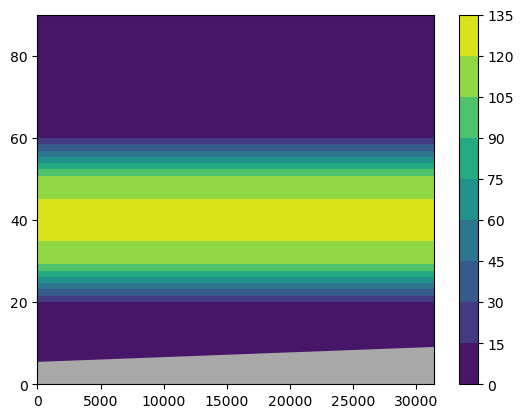

In [64]:
# wind jet ish
ujet = np.zeros([nlevs,nlats,nlons]) + np.array([10,10,10,80,90,80,10,10,10,10])[:,np.newaxis,np.newaxis]
vjet = np.zeros([nlevs,nlats,nlons]) + np.array([10,10,10,80,90,80,10,10,10,10])[:,np.newaxis,np.newaxis]
#zwind1 = np.zeros([nlevs,nlats,nlons]) + 1

transect.wind_cross_section(U=ujet, V=vjet, Z=z, 
                            lats=lats, lons=lons, 
                            start=start, end=end, 
                            topog=topog_rise, n_X=20, n_arrows=10, ztop=80,
                            add_quiver=False)

DEBUG: yscale=277.99 (transect length/height)    mean horizontal wind speed= 45.0


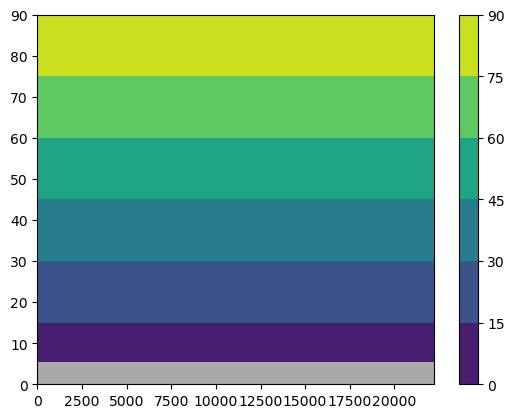

DEBUG: yscale=277.98 (transect length/height)    mean horizontal wind speed= 32.0


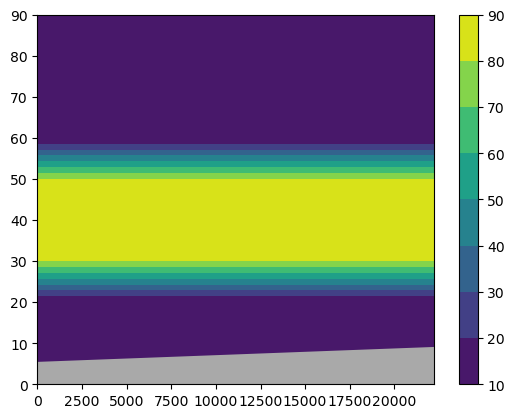

In [65]:
# if we look along the u axis, v winds should not impact plot
start = [0.3,0.3]
end_north = [0.5,0.3]
end_east = [0.3,0.5]
ujet = np.zeros([nlevs,nlats,nlons]) + np.array([10,10,10,80,90,80,10,10,10,10])[:,np.newaxis,np.newaxis]
vshear = np.zeros([nlevs,nlats,nlons]) + levs[:,np.newaxis,np.newaxis]
#zwind1 = np.zeros([nlevs,nlats,nlons]) + 1

transect.wind_cross_section(U=ujet, V=vshear, Z=z, 
                            lats=lats, lons=lons, 
                            start=start, end=end_north, 
                            topog=topog_rise, n_X=20, n_arrows=10, ztop=80,
                            add_quiver=False)
plt.show()

transect.wind_cross_section(U=ujet, V=vshear, Z=z, 
                            lats=lats, lons=lons, 
                            start=start, end=end_east, 
                            topog=topog_rise, n_X=20, n_arrows=10, ztop=80,
                            add_quiver=False)
plt.show()